              precision    recall  f1-score   support

        Alef       0.91      1.00      0.95        51
        Ayin       0.94      0.98      0.96        50
         Bet       0.91      0.98      0.94        50
       Dalet       0.61      0.73      0.67        15
       Gimel       0.98      0.96      0.97        51
          He       0.96      0.94      0.95        52
         Het       0.94      0.96      0.95        49
         Kaf       0.97      0.91      0.94        34
   Kaf-final       1.00      1.00      1.00         2
       Lamed       0.98      0.95      0.96        55
         Mem       0.94      0.88      0.91        51
  Mem-medial       0.98      0.96      0.97        49
   Nun-final       0.91      0.88      0.89        24
  Nun-medial       0.96      0.98      0.97        51
          Pe       1.00      0.83      0.91         6
    Pe-final       1.00      1.00      1.00         3
         Qof       0.98      1.00      0.99        47
        Resh       0.67    

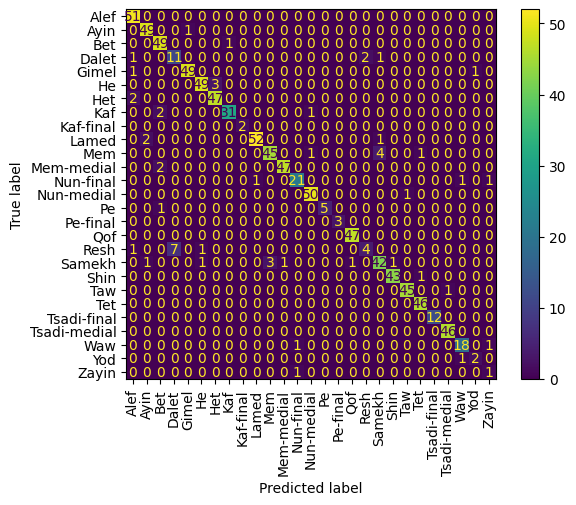

In [2]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torch

from data_management.loadDSSCharacters import dssLettersDataset
from classification_models.CNN_models import CharacterCNN, LeNet5, DanNet1

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay



test_dir = 'Data/dssLetters/test/'

test_set = dssLettersDataset(folder_path= test_dir)
characterClasses = test_set.characterClasses # a list of all the class names

BATCH_SIZE = 32


test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, num_workers=1)


# calculate steps per epoch for training and validation set
testSetlength = len(test_loader.dataset)
testBatchesSteps = len(test_loader.dataset) // BATCH_SIZE



# set the device we will be using to train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LeNet5()#.to(device)\

#criterion = nn.CrossEntropyLoss()
#PATH = 'classification_models\LeNet5CNN_model\model_LeNet5_bs_16-LR_5e-05_DR_0.2.pth'
#PATH = 'classification_models\LeNet5_FINALmodel\model_LeNet5_bs_16-LR_5e-05_DR_0.2.pth'
PATH = 'classification_models\LeNet5_CNN_FINAL\model_LeNet5_bs_16-LR_5e-05_DR_0.2.pth'


#checkpoint = torch.load(path_to_model)
model.load_state_dict(torch.load(PATH, map_location=device))  # map_location makes it possible to load the model trained on a gpu, onto a cpu (for eval)
model.to(device)


def evaluate_model(model, testDataLoader, device, classes):

    ground_truths = []
    predictions = []
    model.eval()

    with torch.no_grad():
        for data in testDataLoader:
            images, labels = data
            images = images.to(device)
            #print(images.shape)
            labels = labels.to(device)
            
            outputs = model(images) #file_name
            preds = torch.argmax(outputs, dim=1)

            [ground_truths.append(label.item()) for label in labels]
            [predictions.append(pred.item()) for pred in preds]
            #print(preds)              
        CM=confusion_matrix(ground_truths, predictions, labels=np.arange(27))

        # this prints the precision, recall and f1-score for each class, and averaged over all classes
        print(classification_report(ground_truths, predictions, target_names=classes))
          
    return CM


# evaluate the model on the testing set (same set as the validation set)
CM = evaluate_model(model,test_loader,device, classes=characterClasses)

      
#print('    accuracy                           0.95       922\n              precision    recall  f1-score   support \n   macro avg       0.94      0.91      0.92       922\nweighted avg       0.95      0.95      0.95       922\n')
disp = ConfusionMatrixDisplay(confusion_matrix=CM,
                              display_labels=test_set.characterClasses)
disp.plot()

plt.xticks(rotation=90)
plt.show()


In [3]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torch

from data_management.loadDSSCharacters import dssLettersDataset
from classification_models.CNN_models import CharacterCNN, LeNet5, DanNet1

from segment import Segment

# set the device we will be using to train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LeNet5()#.to(device)\

#criterion = nn.CrossEntropyLoss()
PATH = "classification_models/model_L5.pth"
PATH = 'classification_models/LeNet5_FINALmodel/model_LeNet5_bs_16-LR_5e-05_DR_0.2.pth'
#PATH = 'classification_models\LeNet5CNN_model\model_LeNet5_bs_16-LR_5e-05_DR_0.2.pth'
PATH = 'classification_models\LeNet5_CNN_FINAL\model_LeNet5_bs_16-LR_5e-05_DR_0.2.pth'

#checkpoint = torch.load(path_to_model)
model.load_state_dict(torch.load(PATH, map_location=device))  # map_location makes it possible to load the model trained on a gpu, onto a cpu (for eval)
model.to(device)

model.eval()


LeNet5(
  (layer1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=400, out_features=120, bias=True)
  (relu): ReLU()
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=84, out_features=27, bias=True)
)

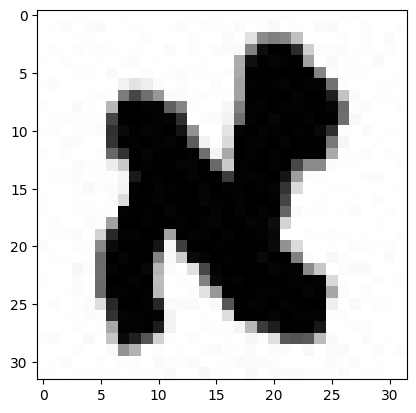

torch.Size([1, 1, 32, 32])
output is; 0


In [4]:
from PIL import Image
import torchvision.transforms as transforms
import cv2
from data_management.augmentation.commonAug import imgResizer

model.eval()

path = "Data/Segmented/page__character_0_x=1003y=788w=45h=43.png"
path = "Data/dssLetters/test/Alef/navis-QIrug-Qumran_extr09_0112-line-005-y1=665-y2=792-zone-HUMAN-x=1907-y=0048-w=0032-h=0038-ybas=0089-nink=483-segm=COCOS5cocos.jpg"

convert_tensor = transforms.ToTensor()

img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)


img = imgResizer(img, desired_size=32)
plt.imshow(img, cmap='gray')
plt.show()
#img = np.expand_dims(img, 0)
im_pil = Image.fromarray(img)

input_img = convert_tensor(im_pil).to(device)

input_img = torch.unsqueeze(input_img, 0)
print(input_img.shape)
output = model(input_img)

print("output is;", torch.argmax(output, 1).item())